In [9]:
import scipy.stats as sp
import numpy as np
import seaborn as sns
import pandas as pd

In [10]:
#PARAMETROS INICIAIS DO PROBLEMA

#Matriz de adjacencia que modela o grafo cujo os vértices são as opiniões/posts
n = 20
A = np.zeros((n, n))  # preenchida com 0.0
rng = np.random.default_rng()
for i in range(n):
    for j in range(n):
        if j == i:
            A[i][j] = 0
        else:
            A[i][j] = rng.random() #valores aleatorios para o trabalho

B = 0.67 #Taxa de transmissão, aumentar esse valor faz com que certos vértices convirjam mais rapidamente, quase instantaneamente, mas aumenta muito o custo computacional em troca

In [11]:
#Probabilidade de um post influenciar um vértice i num tempo t+1
def probx(t, A, i, B): 
    prod = 1
    #vetor de estado preenchido por 20 funções de probabilidade variando no tempo com parâmetros aleatorios
    x = [sp.norm.pdf(t, rng.random(), rng.random()), 
         sp.uniform.pdf(t, rng.random(), 1), 
         sp.bernoulli.pmf(t, rng.random(), rng.random()), 
         sp.poisson.pmf(t, rng.random()),
         sp.binom.pmf(t, 10*t, 0.5),  
         sp.expon.pdf(t, scale=rng.random()), 
         sp.gamma.pdf(t, rng.random()), 
         sp.beta.pdf(t, rng.random(), rng.random()), 
         sp.chi2.pdf(t, rng.random()), 
         sp.t.pdf(t, rng.random()), 
         sp.f.pdf(t, rng.random(), rng.random()), 
         sp.lognorm.pdf(t, rng.random()), 
         sp.weibull_min.pdf(t, rng.random()), 
         sp.rayleigh.pdf(t), 
         sp.pareto.pdf(t, rng.random()), 
         sp. geom.pmf(t, rng.random()), 
         sp.hypergeom.pmf(t, 20, 7, 12), 
         sp.nbinom.pmf(t, rng.random(), rng.random()), 
         sp.laplace.pdf(t), 
         sp. cauchy.pdf(t)] 
    xi = np.array(x)
    xi.transpose()
    for j in range(len(A)):
        prod *= (1 - B*A[i][j]*xi[j]) #produtorio
    return prod

In [12]:
#Calculo de quanto tempo cada vertice leva para ser influenciado

results = [] #vetor para guardar as probabilidades ao longo do processo
r = 0 #contador do tempo total necessario para convencer TODOS os vértices

for i in range(len(A)):
    
    prob = 0 #probabilidade inicial
    t = 1 #Parâmetros de informação
    k = 0 #Contador de iteração
    while prob != 1:
        prob = probx(t, A, i, B)
        results.append(prob)
        
        if prob == 'nan':
            break
        if prob > 0.9999:
                prob = 1
        
        if prob == 1:
            print(f'vértice {i+1} foi convencido por t após {k} tempos')
            prob = 0
            break
        #else:
            print(f'vértice {i+1} sucetivel a t com probabilidade atual de {prob} no tempo {t}')
        t = t + 1
        k = k+1
    r = r + t
ts = np.linspace(1,r,len(results)) #vetor de tempo que começa no tempo inicial e vai até r com tamanho igual ao número de resultados totais
df = pd.DataFrame({
    'Tempo para cada vertice ser convencido (min)' : ts,
    'Probabilidade de ser convencido (100%)': results
}) #conversão do vetor de tempo e resultados num dataframe para ser utilizado pelo plot da biblioteca seaborn


vértice 1 foi convencido por t após 102 tempos
vértice 2 foi convencido por t após 230 tempos
vértice 3 foi convencido por t após 0 tempos
vértice 4 foi convencido por t após 0 tempos
vértice 5 foi convencido por t após 92 tempos
vértice 6 foi convencido por t após 85 tempos
vértice 7 foi convencido por t após 88 tempos


C:\Users\Kiyo\AppData\Local\Temp\ipykernel_11160\4278792769.py:28: RuntimeWarning: invalid value encountered in scalar multiply
  prod *= (1 - B*A[i][j]*xi[j]) #produtorio


vértice 8 foi convencido por t após 162 tempos
vértice 9 foi convencido por t após 130 tempos
vértice 10 foi convencido por t após 0 tempos
vértice 11 foi convencido por t após 131 tempos
vértice 12 foi convencido por t após 181 tempos
vértice 13 foi convencido por t após 129 tempos
vértice 14 foi convencido por t após 160 tempos
vértice 15 foi convencido por t após 140 tempos
vértice 16 foi convencido por t após 118 tempos
vértice 17 foi convencido por t após 104 tempos
vértice 18 foi convencido por t após 98 tempos
vértice 19 foi convencido por t após 126 tempos
vértice 20 foi convencido por t após 0 tempos


<Axes: xlabel='Tempo para cada vertice ser convencido (min)', ylabel='Probabilidade de ser convencido (100%)'>

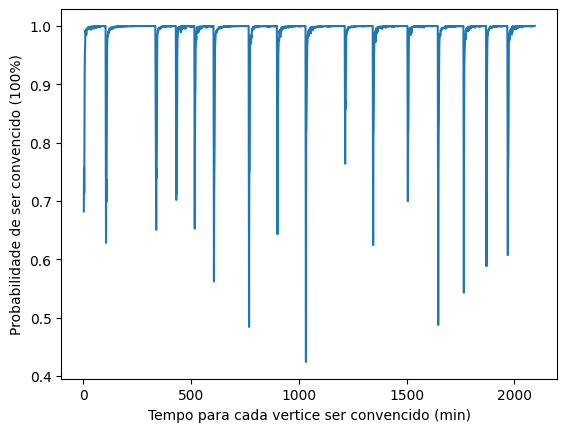

In [13]:
#Plot de quanto tempo cada vértice demora para chegar em 1(100% de chance de ser convencido), ao chegar em 1 começa o cálculo do próximo vértice
sns.lineplot(data= df, x='Tempo para cada vertice ser convencido (min)', y='Probabilidade de ser convencido (100%)')

In [14]:
#Analise da conectividade do grafo

#Matriz de Graus 
D = np.zeros((n, n)) 
for i in range(len(A)):
    for j in range(len(A)):
        D[i][i] = D[i][i]+ A[i][j]

#Matriz Laplaciana
L = D - A

VA, VE = np.linalg.eig(L) #autovalores e autovetores
VA = sorted(VA, reverse=True) #organizando o vetor de autovalores do maior para o menor


#Analisando a conectividade através dos autovalores da matriz laplaciana, VA[-2] é o segundo MENOR autovalor 
if VA[-2] > 1: 
    print(f'Grafo traduzido na forma da Matriz A é conexo, com conectividade algébrica: {VA[-2]}')
elif VA[-2] < 1 and VA[-2] > 0:
    print(f'Grafo traduzido na forma da Matriz A é moderadamente conexo, com conectividade algébrica: {VA[-2]}')
else:
    print(f'Grafo traduzido na forma da Matriz A é desconexo, com conectividade algébrica: {VA[-2]}')

Grafo traduzido na forma da Matriz A é conexo, com conectividade algébrica: (6.602286050625757+0j)
